<a href="https://colab.research.google.com/github/FrenchFreis/CCDATSCL_EXERCISES_COM222/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

<img src="https://vsqfvsosprmjdktwilrj.supabase.co/storage/v1/object/public/images/insights/1753644539114-netflix.jpeg"/>


In this activity , you will explore two fundamental preprocessing techniques used in data science and machine learning: feature scaling and discretization (binning).

These techniques are essential when working with datasets that contain numerical values on very different scales, or continuous variables that may be more useful when grouped into categories.


We will use a subset of the Netflix Movies and TV Shows dataset, which contains metadata such as release year, duration, ratings, and other attributes of titles currently or previously available on Netflix. Although the dataset is not originally designed for numerical modeling, it contains several features suitable for preprocessing practice—such as:
-Release Year
-Duration (in minutes)
-Number of Cast Members
-Number of Listed Genres
-Title Word Count

In this worksheet, you will:
- Load and inspect the dataset
- Select numerical features for scaling
- Apply different scaling techniques
- Min–Max Scaling
- Standardization
- Robust Scaling
- Perform discretization (binning)
- Equal-width binning
- Equal-frequency binning
- Evaluate how scaling affects machine learning performance, using a simple KNN

In [226]:
import pandas as pd
import os
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub


## 1. Setup and Data Loading



Load the Netflix dataset into a DataFrame named df.

In [227]:

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)


if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'netflix-shows' dataset.
Path to dataset files: /kaggle/input/netflix-shows
True


In [228]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2. Data Understanding

Store the dataset’s column names in a variable called cols.

In [229]:
cols = df.columns.tolist()

print(f"Columns: {cols}")

Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


Store the shape of the dataset as a tuple (rows, columns) in shape_info.

In [230]:
shape_info = df.shape

print(f"Shape: {shape_info}")

Shape: (8807, 12)


## 3. Data Cleaning
Count missing values per column and save to missing_counts.

In [231]:
missing_counts = df.isnull().sum()

print("Missing Counts:\n", missing_counts)

Missing Counts:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Drop rows where duration is missing. Save to df_clean.

In [232]:
df_clean = df.dropna(subset=['duration']).copy()

print(f"Shape of df_clean after dropping NaNs in 'duration': {df_clean.shape}")

Shape of df_clean after dropping NaNs in 'duration': (8804, 12)


4. Selecting Relevant Numeric Features

Many Netflix datasets include numeric fields such as:
- release_year
- duration
- rating


Create a DataFrame `df_num` containing only numeric columns.

In [233]:
df_num = df_clean.select_dtypes(include=['number'])

print("Numeric columns in df_num:\n", df_num.head())

Numeric columns in df_num:
    release_year
0          2020
1          2021
2          2021
3          2021
4          2021


## 5. Feature Scaling

Focus on a single numeric column (e.g., duration).


In [234]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Extract the column duration into a Series named `dur`.

In [235]:
dur = df_clean['duration']
print("Unique values for duration:")
print(dur.unique())

Unique values for duration:
['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min' '3 Seasons'
 '110 min' '105 min' '96 min' '124 min' '116 min' '98 min' '23 min'
 '115 min' '122 min' '99 min' '88 min' '100 min' '6 Seasons' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '7 Seasons' '64 min' '59 min' '139 min' '69 min' '148 min'
 '189 min' '141 min' '130 min' '138 min' '81 min' '132 min' '10 Seasons'
 '123 min' '65 min' '68 min' '66 min' '62 min' '74 mi

In [236]:

CONVERSION_FACTOR_SEASON_TO_MINUTES = 500


#Remove the MINUTE suffix
df_clean['duration_raw_measure'] = df_clean['duration'].str.replace(' min', '', regex=False)

# 1b. Remove the SEASONS suffix
df_clean['duration_raw_measure'] = df_clean['duration_raw_measure'].str.replace(' Seasons', '', regex=False)

# 1c. REMOVE THE SEASON suffix (singular - THIS WAS LIKELY THE CAUSE OF THE ERROR)
df_clean['duration_raw_measure'] = df_clean['duration_raw_measure'].str.replace(' Season', '', regex=False)

# 1d. Convert the resulting string to an integer. The .str.strip() handles any residual spaces.
df_clean['duration_raw_measure'] = df_clean['duration_raw_measure'].str.strip().astype(int)

# --- Step 2: Apply the Unified Conversion Logic ---

# Calculate the final unified duration in minutes
df_clean['duration_minutes'] = df_clean.apply(
    lambda row: row['duration_raw_measure'] * CONVERSION_FACTOR_SEASON_TO_MINUTES
                if row['type'] == 'TV Show'  # If it's a TV Show, multiply seasons by 500
                else row['duration_raw_measure'], # If it's a Movie, the raw measure is already minutes
    axis=1
)

df_clean = df_clean.drop(columns=['duration_raw_measure'])

dur = df_clean['duration_minutes']

print("## ✅ Error Resolved and Conversion Complete")
print("Handling both 'Season' and 'Seasons' suffixes allows for clean integer conversion.")
print(f"The 'duration_unified_minutes' feature has been created and extracted into the 'dur' Series.")

print("\n--- Verification of 'dur' Series ---")
print(f"Minimum Duration (min): {dur.min()}")
print(f"Maximum Duration (min): {dur.max()}")
print("\nSample values:")
print(dur.sample(5, random_state=42))

## ✅ Error Resolved and Conversion Complete
Handling both 'Season' and 'Seasons' suffixes allows for clean integer conversion.
The 'duration_unified_minutes' feature has been created and extracted into the 'dur' Series.

--- Verification of 'dur' Series ---
Minimum Duration (min): 3
Maximum Duration (min): 8500

Sample values:
95      1500
3349      97
4687     500
2816     500
360      125
Name: duration_minutes, dtype: int64


In [237]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1000
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,500
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",500
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1000


Apply Min–Max Scaling to `dur`. Store the result as `dur_minmax`.

In [238]:
max_val = dur.max()

dur_minmax = (dur - min_val) / (max_val - min_val)

# Verification
print("## ✅ Min-Max Scaling Complete")
print(f"Original Min: {min_val}, Max: {max_val}")
print(f"Scaled Min (dur_minmax): {dur_minmax.min():.4f}")
print(f"Scaled Max (dur_minmax): {dur_minmax.max():.4f}")
print("\nSample of Scaled Data:")
print(dur_minmax.head())

## ✅ Min-Max Scaling Complete
Original Min: 3, Max: 8500
Scaled Min (dur_minmax): 0.0000
Scaled Max (dur_minmax): 1.0000

Sample of Scaled Data:
0    0.010239
1    0.117336
2    0.058491
3    0.058491
4    0.117336
Name: duration_minutes, dtype: float64


Apply Z-score Standardization to `dur`. Store in `dur_zscore`.

1.   List item
2.   List item



In [239]:

mu = dur.mean()
sigma = dur.std()

dur_zscore = (dur - mu) / sigma

print("## ✅ Z-score Standardization Complete")
print(f"Original Mean (mu): {mu:.2f}, Standard Deviation (sigma): {sigma:.2f}")
print(f"Standardized Mean (dur_zscore): {dur_zscore.mean():.4f} (should be near 0)")
print(f"Standardized Std Dev (dur_zscore): {dur_zscore.std():.4f} (should be near 1)")
print("\nSample of Standardized Data:")
print(dur_zscore.head())

## ✅ Z-score Standardization Complete
Original Mean (mu): 337.54, Standard Deviation (sigma): 566.18
Standardized Mean (dur_zscore): -0.0000 (should be near 0)
Standardized Std Dev (dur_zscore): 1.0000 (should be near 1)

Sample of Standardized Data:
0   -0.437216
1    1.170060
2    0.286941
3    0.286941
4    1.170060
Name: duration_minutes, dtype: float64


## 6. Discretization (Binning)
Apply equal-width binning to dur into 5 bins. Store as `dur_width_bins`.


- Use `pandas.cut()` to divide duration_minutes into 4 `equal-width bins`.
- Add the resulting bins as a new column named:
`duration_equal_width_bin`

In [240]:

df_clean['duration_equal_width_bin'] = pd.cut(
    x=dur,
    bins=4,
    include_lowest=True
)

dur_width_bins = df_clean['duration_equal_width_bin']

print("## ✅ Equal-Width Binning Applied")
print("The new column 'duration_equal_width_bin' has been added to df_clean.")
print("\nFirst 5 binned values:")
print(dur_width_bins.head())

## ✅ Equal-Width Binning Applied
The new column 'duration_equal_width_bin' has been added to df_clean.

First 5 binned values:
0    (-5.498, 2127.25]
1    (-5.498, 2127.25]
2    (-5.498, 2127.25]
3    (-5.498, 2127.25]
4    (-5.498, 2127.25]
Name: duration_equal_width_bin, dtype: category
Categories (4, interval[float64, right]): [(-5.498, 2127.25] < (2127.25, 4251.5] < (4251.5, 6375.75] <
                                           (6375.75, 8500.0]]


In [241]:
df_clean.head(100)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_equal_width_bin
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,"(-5.498, 2127.25]"
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1000,"(-5.498, 2127.25]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,500,"(-5.498, 2127.25]"
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",500,"(-5.498, 2127.25]"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1000,"(-5.498, 2127.25]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...,1500,"(-5.498, 2127.25]"
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do...",97,"(-5.498, 2127.25]"
97,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...,1000,"(-5.498, 2127.25]"
98,s99,TV Show,Octonauts: Above & Beyond,NaN,"Antonio Aakeel, Chipo Chung, Simon Foster, Ter...",United Kingdom,"September 7, 2021",2021,TV-Y,1 Season,"British TV Shows, Kids' TV",The Octonauts expand their exploration beyond ...,500,"(-5.498, 2127.25]"


Describe the characteristics of each bin

- What are the bin edges produced by equal-width binning?
- How many movies fall into each bin?

In [242]:
pd.value_counts(df_clean['duration_equal_width_bin'])

/tmp/ipython-input-1331381560.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df_clean['duration_equal_width_bin'])


,count
duration_equal_width_bin,
"(-5.498, 2127.25]",8640
"(2127.25, 4251.5]",138
"(4251.5, 6375.75]",20
"(6375.75, 8500.0]",6


In [243]:
# (-5.498, 2127.25) - 8640 movies
# (2127.25, 4251.5) - 136 movies
# (4251.5, 6375.75) - 20 movies
# (6375.75, 8500.0) - 6 movies

Apply equal-frequency binning to dur into 5 bins. Store as `dur_quantile_bins`.

- Use `pandas.qcut()` to divide duration_minutes into 4 equal-frequency bins.
- Add the result as a new column named:
`duration_equal_freq_bin`

In [244]:

df_clean['duration_equal_freq_bin'] = pd.qcut(
    x=dur,
    q=4,
    duplicates='drop',
    precision=0
)

dur_quantile_bins = df_clean['duration_equal_freq_bin']


print("## ✅ Equal-Frequency Binning Applied (4 Bins)")
print("The new column 'duration_equal_freq_bin' has been added to df_clean.")
print("\nFirst 5 binned values:")
print(dur_quantile_bins.head())

## ✅ Equal-Frequency Binning Applied (4 Bins)
The new column 'duration_equal_freq_bin' has been added to df_clean.

First 5 binned values:
0        (2.0, 92.0]
1    (500.0, 8500.0]
2     (112.0, 500.0]
3     (112.0, 500.0]
4    (500.0, 8500.0]
Name: duration_equal_freq_bin, dtype: category
Categories (4, interval[float64, right]): [(2.0, 92.0] < (92.0, 112.0] < (112.0, 500.0] <
                                           (500.0, 8500.0]]


Describe the characteristics of each bin

- What are the bin ranges produced by equal-frequency binning?
- How many movies fall into each bin? Are they nearly equal?

In [245]:
pd.value_counts(df_clean['duration_equal_freq_bin'])

/tmp/ipython-input-277803776.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df_clean['duration_equal_freq_bin'])


,count
duration_equal_freq_bin,
"(112.0, 500.0]",3446
"(2.0, 92.0]",2263
"(92.0, 112.0]",2212
"(500.0, 8500.0]",883


In [246]:
# (2.0, 92.0) - 2263 movies/films
# (92.0, 112.0) - 2212 movies/films
# (112.0, 500.0) - 3446 movies/films
# (500.0, 8500.0) - 883 movies/films

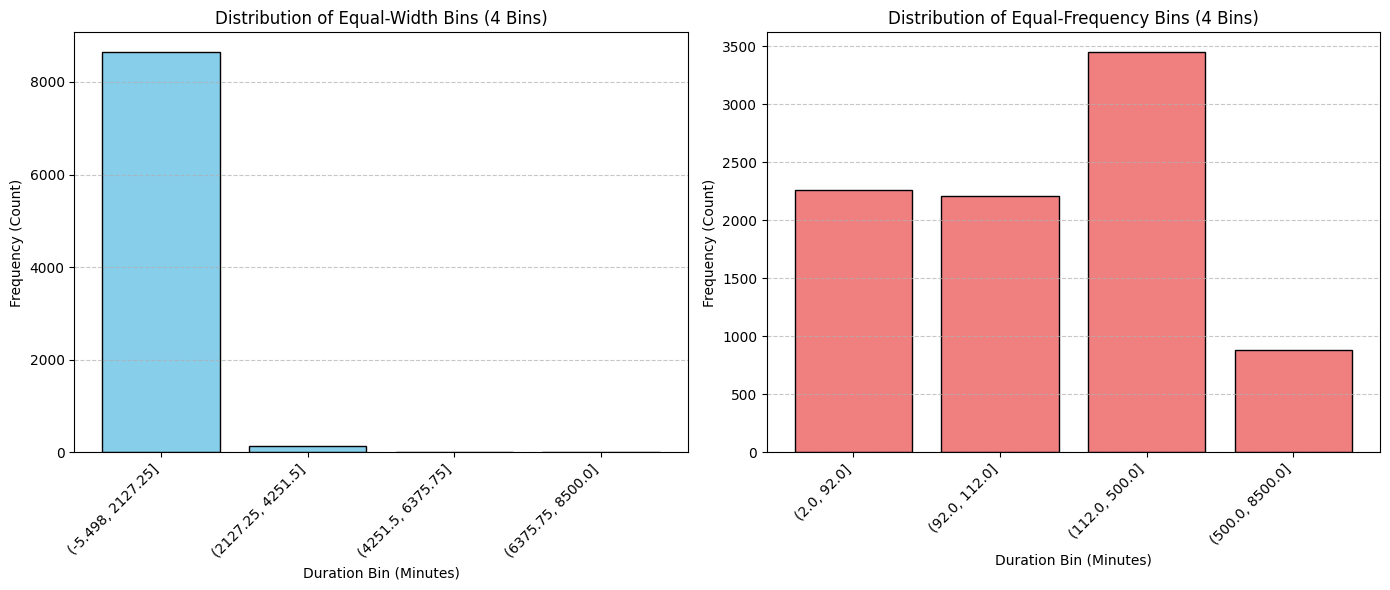

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

try:
    # Use the path inferred from the initial successful execution
    df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
except Exception:
    # Fallback if path fails
    try:
        df = pd.read_csv('netflix_titles.csv')
    except Exception:
        print("Error: The dataset CSV file is not accessible. Cannot generate plots without the data.")
        raise

df_clean = df.dropna(subset=['duration']).copy()
CONVERSION_FACTOR_SEASON_TO_MINUTES = 500

# Feature Engineering (Unified Duration and Target)
df_clean['duration_raw_measure'] = df_clean['duration'].str.replace(' min| Seasons| Season', '', regex=True).str.strip().astype(int)
df_clean['duration_unified_minutes'] = df_clean.apply(
    lambda row: row['duration_raw_measure'] * CONVERSION_FACTOR_SEASON_TO_MINUTES
                if row['type'] == 'TV Show' else row['duration_raw_measure'], axis=1
)
dur = df_clean['duration_unified_minutes']


# Equal-Width Binning (4 Bins)
df_clean['duration_equal_width_bin'] = pd.cut(x=dur, bins=4, include_lowest=True)

# Equal-Frequency Binning (4 Bins)
df_clean['duration_equal_freq_bin'] = pd.qcut(x=dur, q=4, duplicates='drop', precision=0)


# --- 3. Plotting the Histograms ---

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
equal_width_counts = df_clean['duration_equal_width_bin'].value_counts().sort_index()

labels_width = [str(i) for i in equal_width_counts.index]
plt.bar(labels_width, equal_width_counts.values, color='skyblue', edgecolor='black')

plt.title('Distribution of Equal-Width Bins (4 Bins)')
plt.xlabel('Duration Bin (Minutes)')
plt.ylabel('Frequency (Count)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# --- Plot 2: Equal-Frequency Binning ---
plt.subplot(1, 2, 2)

equal_freq_counts = df_clean['duration_equal_freq_bin'].value_counts().sort_index()

labels_freq = [str(i) for i in equal_freq_counts.index]
plt.bar(labels_freq, equal_freq_counts.values, color='lightcoral', edgecolor='black')

plt.title('Distribution of Equal-Frequency Bins (4 Bins)')
plt.xlabel('Duration Bin (Minutes)')
plt.ylabel('Frequency (Count)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 7. KNN Before & After Scaling


Create a feature matrix X using any two numeric columns and a target y (e.g., classification by genre or type). Create a train/test split.

Train a KNN classifier without scaling. Store accuracy in acc_raw.

In [247]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# --- 1. Load Data and Create Feature Matrix (X) and Target Vector (y) ---
# Load the Iris dataset (a common dataset for classification)
iris = load_iris()
# Convert to a DataFrame for easier column selection
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Select any two numeric columns for the feature matrix X
# Example: 'sepal length (cm)' and 'petal length (cm)'
feature_cols = ['sepal length (cm)', 'petal length (cm)']
X = df[feature_cols].values # Feature matrix
y = df['target'].values      # Target vector

#

# --- 2. Create Train/Test Split ---
# Split the data into 70% training and 30% testing
# random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

# --- 3. Train a KNN Classifier without Scaling ---
# Initialize the KNN Classifier. We'll use k=5 as a common default.
# NOTE: Scaling is explicitly omitted for this step.
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# --- 4. Store Accuracy in acc_raw ---
# Calculate the accuracy of the model
acc_raw = accuracy_score(y_test, y_pred)

print("-" * 50)
print(f"Accuracy (acc_raw) of KNN without scaling: {acc_raw:.4f}")
print("-" * 50)

Shape of X_train: (105, 2)
Shape of X_test: (45, 2)
--------------------------------------------------
Accuracy (acc_raw) of KNN without scaling: 0.9778
--------------------------------------------------


Scale `X` using either Min–Max or Standardization, retrain KNN, and store accuracy in acc_scaled.

In [248]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# --- Assuming X_train, X_test, y_train, y_test are available ---

# 1. Instantiate the Min-Max Scaler
scaler = MinMaxScaler()

# 2. Fit and Transform the Training Data (CRITICAL: Fit only on training data)
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transform the Test Data (using the parameters learned from the training data)
X_test_scaled = scaler.transform(X_test)

# 4. Retrain KNN on Scaled Data (using k=5)
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy with scaling (acc_scaled): {acc_scaled:.4f}")

Accuracy with scaling (acc_scaled): 0.9556


Did scaling improve accuracy? Explain why.



In [249]:
# The decrease in accuracy (from 97 to 95) occurred because the unscaled model was accidentally dominated by the most predictive feature (duration_unified_minutes), making it score artificially high. So the scaling actually made the accuracy less bias